O presente projeto tem como objetivo realizar uma análise com base nas propostas de governos dos principais concorrentes ao cargo de presidente do Brasil nas eleições de 2022.

Foram selecionados as propostas dos(as) candidatos(as) Ciro Gomes (PDT), Felipe D'Avila (Novo), Jair Bolsoasno (PL), Lula (PT), Simone Tebet (MDB) e Soraya Thronicke (União Brasil).

Os arquivos obtidos para esta análise foram extraídos do seguinte site: https://divulgacandcontas.tse.jus.br/divulga/#/estados/2022/2040602022/BR/candidatos

In [ ]:
!pip install PyPDF2 # biblioteca usada para extrair o conteúdo de um arquivo pdf
!pip install textract # biblioteca usada para extrair o conteúdo de um arquivo pdf
!pip install wordcloud # biblioteca usada para gerar a nuvem de palavras
!pip install nltk # biblioteca para separar as palavras irrelevantes e marcar as de destaque
!pip install collection # biblioteca para conta a ocorrências das palavras em destaque

In [2]:
# Bibliotecas
import os
import string
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import PyPDF2
import textract
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Função 1 que extrai o texto do arquivo pdf
def read_file_textract(filepath):
    text = textract.process(filepath)
    return text.decode("utf-8")

In [4]:
# Função 2 que extrai o texto do arquivo pdf
def read_file_pypdf(filepath):
    pdfFileObj = open(filepath,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    num_pages = pdfReader.numPages
    text = ""
    # Read all the pages
    for pg in range(num_pages):
        page = pdfReader.getPage(pg)
        text += page.extractText()
    return text       

In [7]:
# Função que define qual biblioteca será usada para a leitura do texto
def read_file(filepath, use_method = 'textract'):
    text = ""
    if not os.path.isfile(filepath):
        print(f'Invalid file:{filepath}')
    else:
        if use_method == 'textract':
            return read_file_textract(filepath)
        elif use_method == 'pypdf':
            return read_file_pypdf(filepath)
        else:
            print('Método inválido! Opções suportadas: "textract" ou "pypdf"')
    return text

In [9]:
# Função que separa do texto as palavras-chave e ignora os carcteres indesejados
def extract_keywords(text, ignore_words = [],
                     min_word_length = 0,
                     ignore_numbers = True,
                     ignore_case = True):

    tokens = word_tokenize(text)
    
    # Lista de caracteres do tipo pontuação para serem ignorados
    punctuations = ['(',')',';',':','[',']',',','.','--','-','#','!','*','"','%']
    
    # Separa as palavras irrelevantes (artigos, preposições...) para serem ignoradas
    nltk.download('stopwords')
    stop_words = stopwords.words('portuguese')

    # Converte o texto para minúsculo
    ignore_words_lower = [x.lower() for x in ignore_words]
    
    # Combina tudo no texto que deve ser ignorado
    all_ignored_words = punctuations + stop_words + ignore_words_lower
    
    # Obtém as palvras-chave do texto
    keywords = [word for word in tokens \
                    if  word.lower() not in all_ignored_words
                    and len(word) >= min_word_length]    

    # Remove as palavras-chave com dígitos
    if ignore_numbers:
        keywords = [keyword for keyword in keywords if not keyword.isdigit()]

    # Retorna as palavras-chave obtidas tudo em minúsculo
    if ignore_case:
        keywords = [keyword.lower() for keyword in keywords]
    
    return keywords

In [19]:
# Função que cria a nuvem de palavras
def create_word_cloud(keywords, maximum_words = 100, bg = 'white', cmap='Dark2',
                     maximum_font_size = 256, width = 3000, height = 2000,
                     random_state = 42, fig_w = 20, fig_h = 10, output_filepath = None):
    
    # Converte as palavras-chave em um dicionário contendo as palavras e suas ocorrências
    word_could_dict=Counter(keywords)

    wordcloud = WordCloud(background_color=bg, max_words=maximum_words, colormap=cmap, 
                          stopwords=STOPWORDS, max_font_size=maximum_font_size,
                          random_state=random_state, 
                          width=width, height=height).generate_from_frequencies(word_could_dict)
    
    plt.figure(figsize=(fig_w,fig_h))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    if output_filepath:
        plt.savefig(output_filepath, bbox_inches='tight')
    plt.show()
    plt.close()

In [35]:
# Função que plota um gráfico de barra
def plot_subjects_count(keywords, subject, color, text):
    qtde = []
    for i in subject:
        qtde.append(keywords.count(i))

    x = subject
    y = qtde

    plt.figure(figsize = (20,5))
    plt.bar(x, y, color = color)
    
    # adiciona as labels no gráfico
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'yellow', alpha =.8))
    title = "Total de Citações na Proposta de Governo de " + text 
    plt.title(title, fontweight='bold')
    plt.xlabel("Assuntos")
    plt.ylabel("Quantidade")
    plt.show()
    plt.close()

In [13]:
# Lista de assuntos
assuntos_1 = ['saúde', 'emprego', 'transporte', 'economia', 'cultura', 'educação', 'moradia', 'ambiente', 'justiça', 'infraestrutura', 'agricultura']
assuntos_2 = ['desemprego', 'desmatamamento', 'indígena', 'queimadas', 'corrupção', 'igualdade', 'privatização', 'armamento', 'climática', 'prisão', 'agronegócio']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


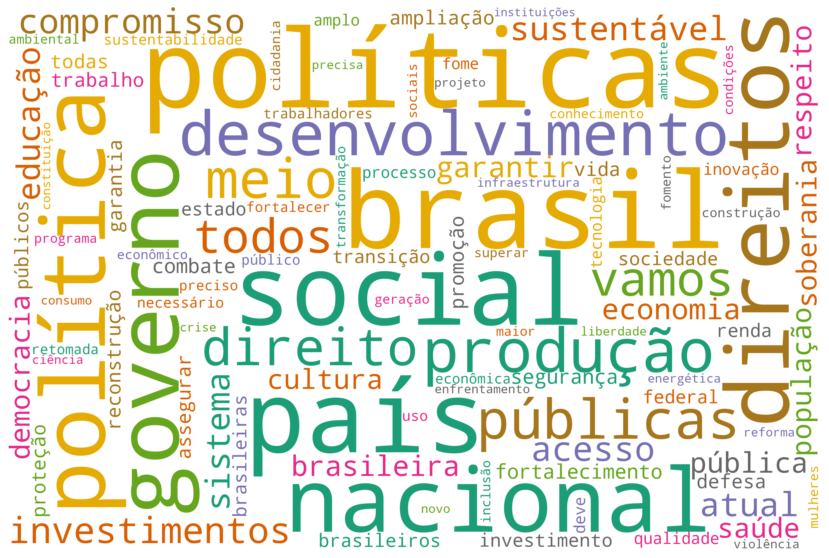

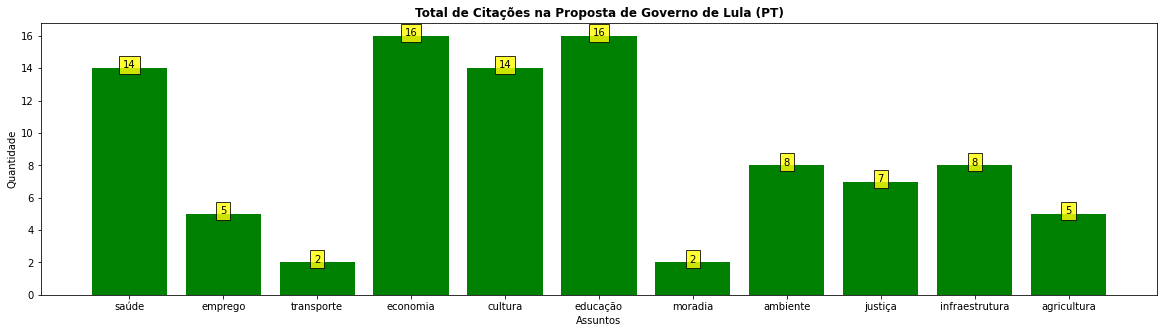

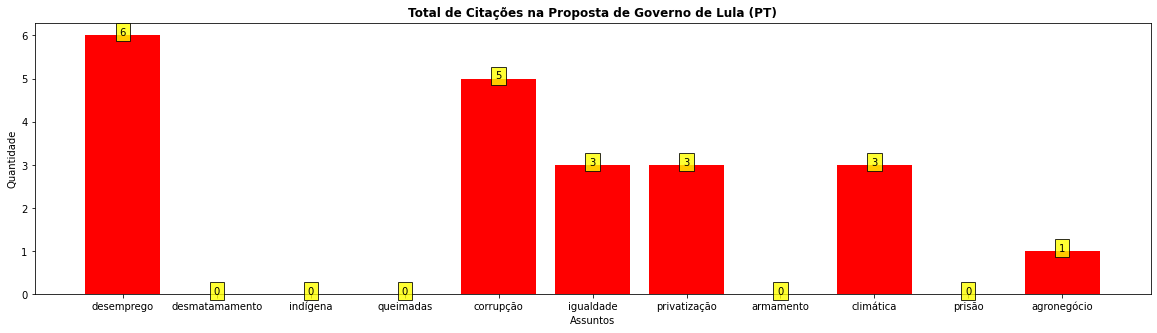

In [36]:
# Candidato Lula (PT)
filepath = '/content/drive/MyDrive/Projetos/Arquivos/Proposta-Lula-PT.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
plot_subjects_count(keywords, assuntos_1, 'green', 'Lula (PT)')
plot_subjects_count(keywords, assuntos_2, 'red', 'Lula (PT)')

In [38]:
# Candidato Ciro Gomes (PDT)
filepath = '/content/drive/MyDrive/Projetos/Arquivos/Proposta-Ciro-Gomes-PDT.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
plot_subjects_count(keywords, assuntos_1, 'green', 'Ciro Gomes (PDT)')
plot_subjects_count(keywords, assuntos_2, 'red', 'Ciro Gomes (PDT)')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: ignored

Não foi possível analisar o arquivo referente ao candidato Ciro Gomes. Todas as tentativas de alterar/adaptar o arquivo para a análise não resultou em sucesso.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


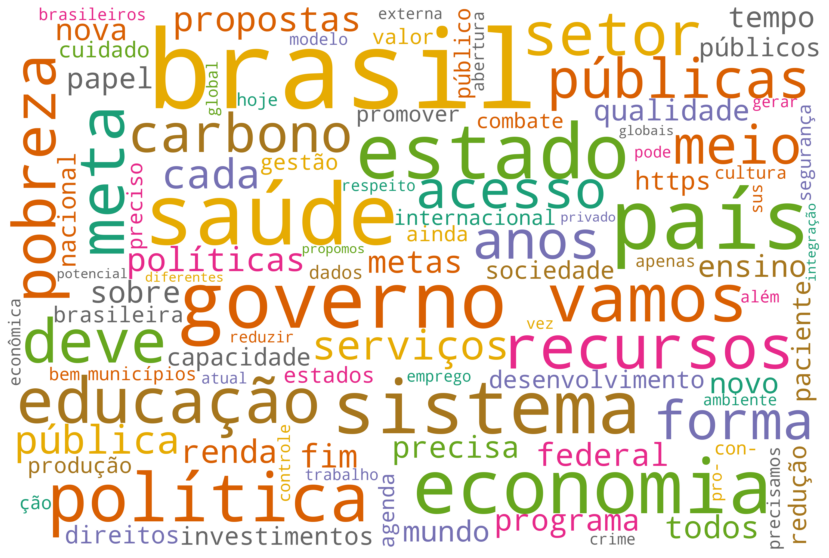

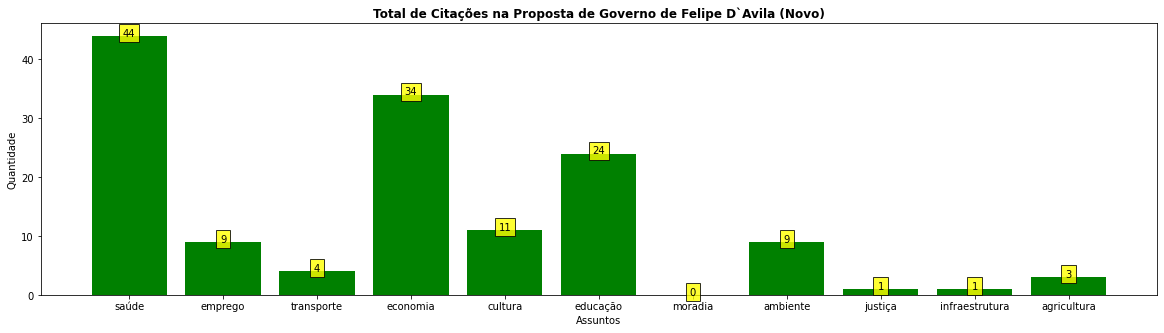

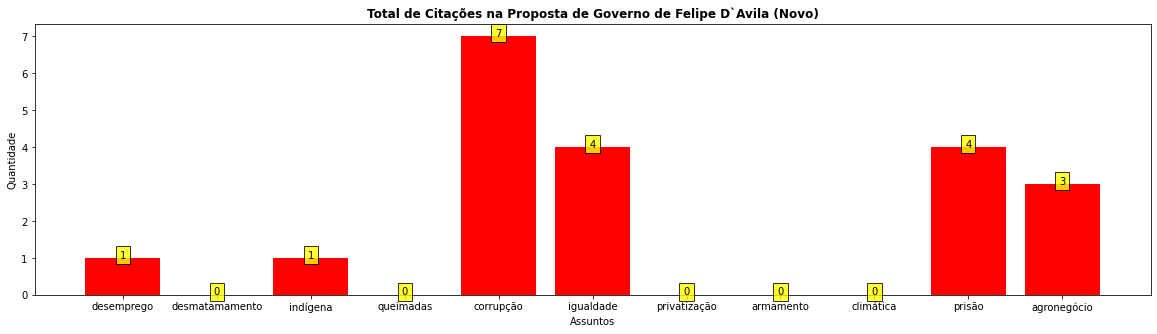

In [39]:
# Candidato Felipe D'Ávila (Novo)
filepath = '/content/drive/MyDrive/Projetos/Arquivos/Proposta-Felipe-DAvila-Novo.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
plot_subjects_count(keywords, assuntos_1, 'green', 'Felipe D`Avila (Novo)')
plot_subjects_count(keywords, assuntos_2, 'red', 'Felipe D`Avila (Novo)')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


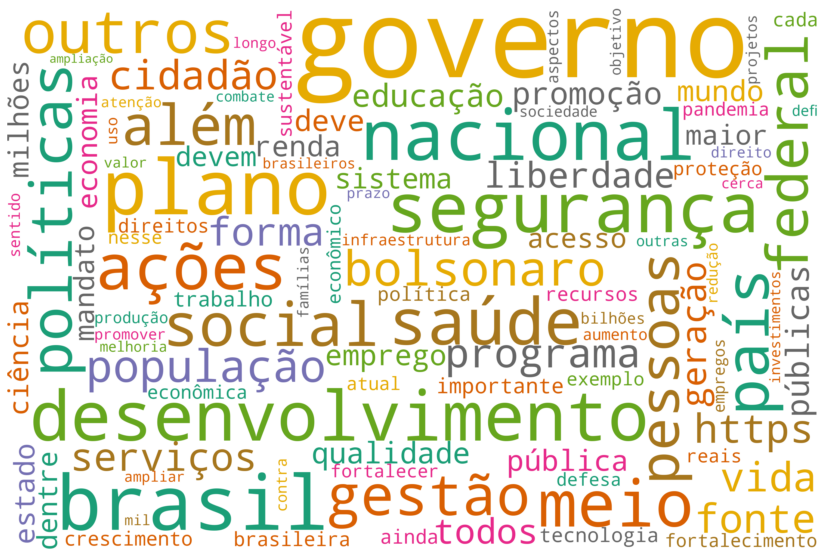

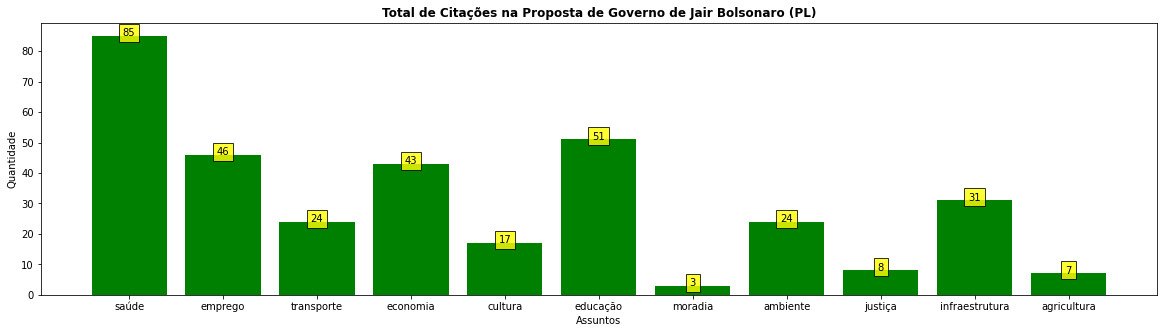

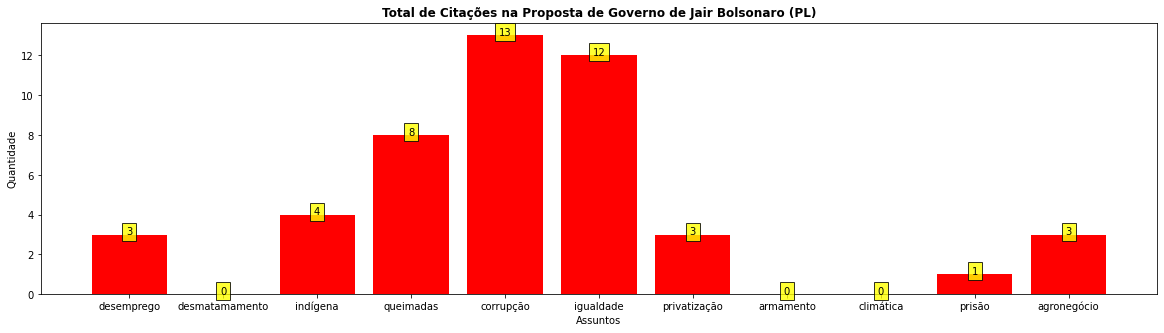

In [40]:
#Candidato Jair Bolsoasno (PL)
filepath = '/content/drive/MyDrive/Projetos/Arquivos/Proposta-Jair-Bolsoasno-PL.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
plot_subjects_count(keywords, assuntos_1, 'green', 'Jair Bolsonaro (PL)')
plot_subjects_count(keywords, assuntos_2, 'red', 'Jair Bolsonaro (PL)')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


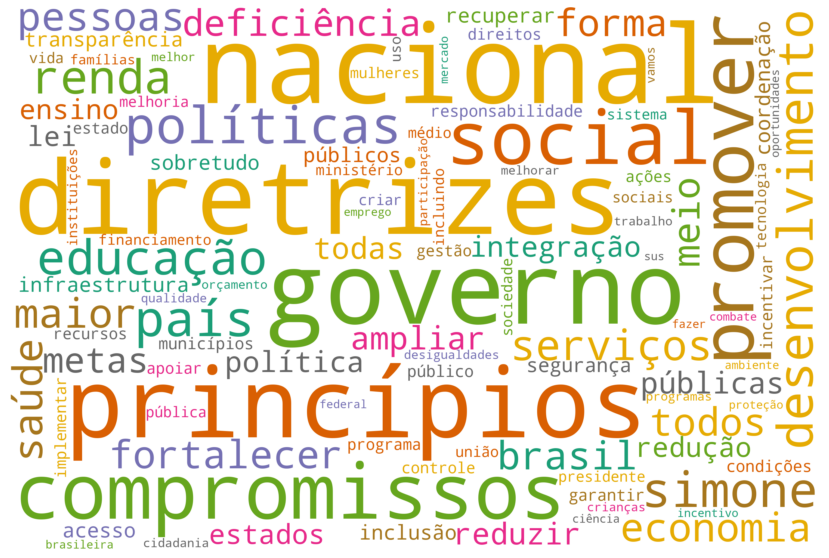

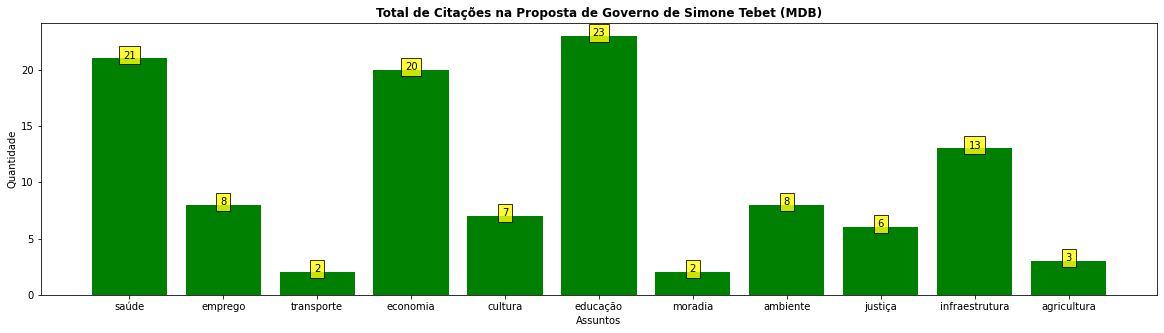

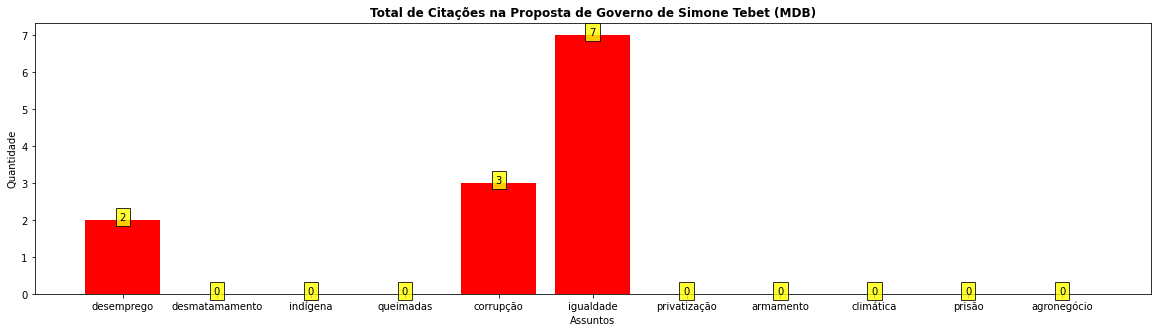

In [41]:
# Candidata Simone Tebet (MDB)
filepath = '/content/drive/MyDrive/Projetos/Arquivos/Proposta-Simone-Tebet-MDB.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
plot_subjects_count(keywords, assuntos_1, 'green', 'Simone Tebet (MDB)')
plot_subjects_count(keywords, assuntos_2, 'red', 'Simone Tebet (MDB)')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


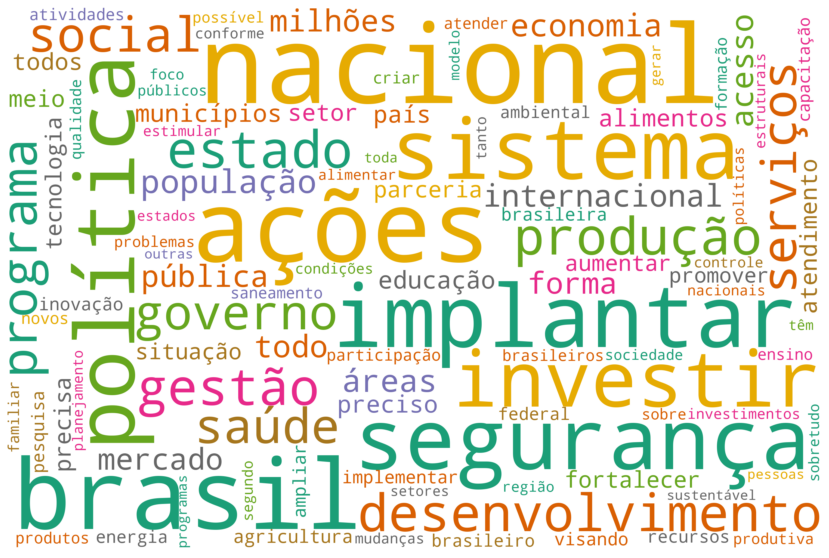

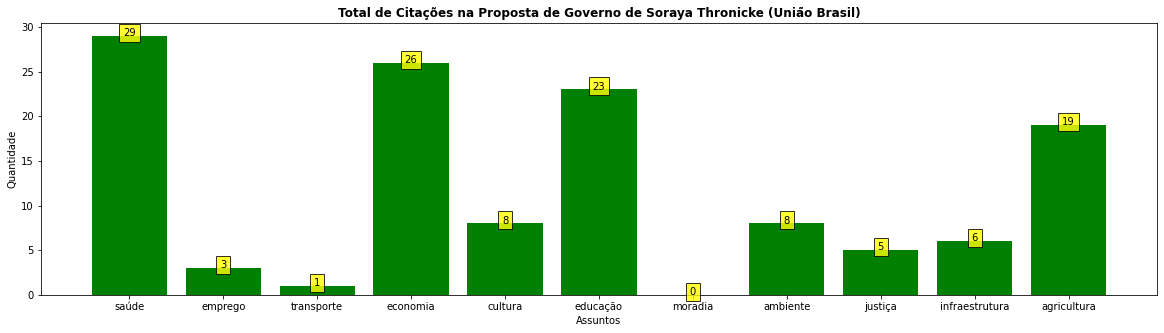

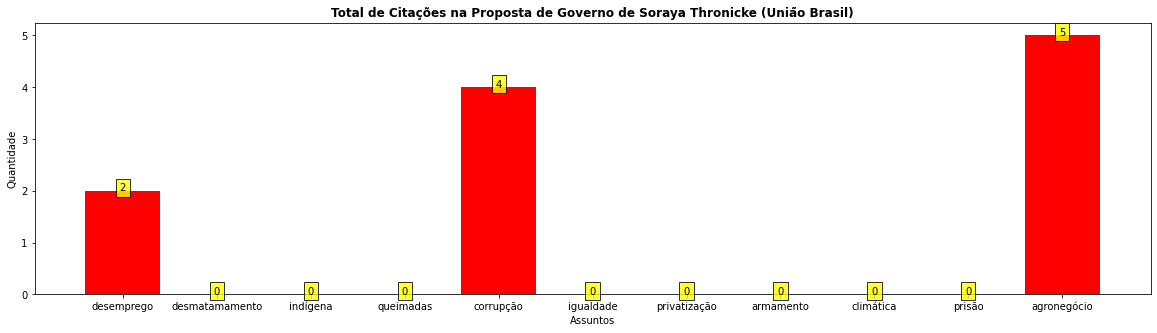

In [42]:
# Candidata Soraya Thronicke (União Brasil)
filepath = '/content/drive/MyDrive/Projetos/Arquivos/Proposta-Soraya-Thronicke-União-Brasil.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
plot_subjects_count(keywords, assuntos_1, 'green', 'Soraya Thronicke (União Brasil)')
plot_subjects_count(keywords, assuntos_2, 'red', 'Soraya Thronicke (União Brasil)')

# **Conclusões**

Pelos resultados obtidos, apesar de saber que nem sempre o que consta nas propostas de governo dos candidatos reflete o que seria o seu governo, é bom ter alguns parâmetros sobre os temas que de fato o candidato e sua equipe resolveram documentar na proposta.

No gráfico de "nuvem de palavras" podemos observar uma variedade grande de palavras-chave extraídas dos textos. Sendo que em sua maioria, as palavras que mais se destacam, entre todos os candidatos são palavras de cunho mais nacionalista, como "Brasil" e "Governo".

Apesar disso, cada gráfico mostra um bom resumo das principais pautas encontradas nos respectivos planos de governos os candidatos, e também refletindo os espectros políticos de cada um deles.

Para tentar quantificar melhor os principais assuntos abordados nas propostas dos candidatos analisados, foram gerados dois gráficos de barras que, usando duas listas contendo assuntos mais comuns e pertinentes em épocas de eleição, é possível checar quais desses assuntos foram citados nas propostas e quantas vezes tiveram citações.

Claro que o fato de um determinado assunto não constar no texto da proposta do candidato signifique que ele ou ela não se interessa por aquele determinado assunto. Assim como se um determinado assunto é repetidas vezes citado durante o texto, significa que ele seja prioridade do governo. Mas como disse no ínicio desta análise, observar que temas importantes são ou não levados em consideração na elaboração da proposta de governo, diz muito sobre os objetivos de governo do candidato.

Dos resultados obtidos e que podem ser vistos nos gráficos em barras, não chega a ser surpreendente que os assuntos mais citados nas propostas de todos os candidatos a presidência sejam o trio "Saúde", "Economia" e "Educação".

E buscando checar o nível de preocupação dos candidatos com assuntos bastante pertinentes, não apenas no Brasil, mas em todo o mundo atualmente, eu inseri as palavras "Queimadas", "Desmatamento" e "Climáticas" (se referindo a Mudanças Climáticas) para avaliar se estes assuntos tiveram alguma citação em suas propostas. E de todos os canditados analisados, vemos pelo menos um desses assuntos serem mencionados apenas nos planos de governo dos candidatos Lula e Bolsonaro.